# Purpose: input raw data files from Kaggle and output cleaned data file as csv format for analysis in later parts. 

This is to ensure that we do not have to redo the data cleaning steps everytime we perform data analysis

## Import packages

In [1]:
import pandas as pd
import numpy as np
import glob
import re
import os
import fitz
import math
from textblob import TextBlob
from langdetect import detect

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Lu
[nltk_data]     Xinyi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
#read data
trump = pd.read_csv('data/hashtag_donaldtrump.csv', lineterminator='\n')
biden = pd.read_csv('data/hashtag_joebiden.csv', lineterminator='\n')

In [3]:
trump.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121


In [4]:
biden.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:18,1.316529e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,8.099044e+08,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",...,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283
2,2020-10-15 00:00:20,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,...,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566
3,2020-10-15 00:00:21,1.316529e+18,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596e+17,Michelle Ferg,MichelleFerg4,NaN,...,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849
4,2020-10-15 00:00:22,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,...,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132


In [5]:
trump.shape

(970919, 21)

In [6]:
biden.shape

(776886, 21)

In [7]:
trump.dtypes

created_at               object
tweet_id                float64
tweet                    object
likes                   float64
retweet_count           float64
source                   object
user_id                 float64
user_name                object
user_screen_name         object
user_description         object
user_join_date           object
user_followers_count    float64
user_location            object
lat                     float64
long                    float64
city                     object
country                  object
continent                object
state                    object
state_code               object
collected_at             object
dtype: object

In [8]:
trump.country.unique()

array(['United States of America', nan, 'United Kingdom', 'Germany',
       'United States', 'Australia', 'Costa Rica', 'Barbados', 'Cameroon',
       'The Netherlands', 'Mexico', 'Canada', 'France', 'Peru',
       'Argentina', 'South Korea', 'Finland', 'Mongolia', 'India',
       'Japan', 'Turkey', 'Switzerland', 'Iran', 'Portugal', 'Ireland',
       'Russia', 'Greece', 'Egypt', 'Ecuador', 'Colombia', 'Sri Lanka',
       'Italy', 'China', 'Malaysia', 'Indonesia', 'Venezuela', 'Thailand',
       'Sweden', 'Nepal', 'Bangladesh', 'Philippines',
       'Dominican Republic', 'New Zealand', 'Chile', 'Honduras',
       'Azerbaijan', 'Georgia', 'Spain', 'Cyprus', 'Morocco',
       'Netherlands', 'Saudi Arabia', 'Norway', 'Singapore', 'Cuba',
       'Niger', 'Hungary', 'Greenland', 'United Arab Emirates', 'Brazil',
       'Uganda', 'Guatemala', 'Pakistan', 'Taiwan', 'Qatar',
       'Afghanistan', 'South Africa', 'Nigeria', 'Slovakia', 'Guyana',
       'Kenya', 'Iraq', 'Denmark', 'Uruguay', 'Be

In [9]:
trump.continent.unique()

array(['North America', nan, 'Europe', 'Oceania', 'Africa',
       'South America', 'Asia', 'Antarctica'], dtype=object)

In [10]:
biden.continent.unique()

array(['North America', nan, 'Europe', 'Asia', 'Africa', 'Oceania',
       'South America', 'Antarctica'], dtype=object)

In [11]:
import emoji

def CleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text)
    text = re.sub(r'#','',text)
    text = re.sub(r'RT[\s]+','',text)
    text = re.sub(r'https?:\/\/\S+','',text) #remove urls
    text = re.sub(r'[^\w]', ' ', text)
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)
    
    text = emoji_pattern.sub(r'', text)
    text = text.lower()
    return text

def CleanData(data):
    df = data.copy()
    
    #only filter for english tweets
    for index, row in df.iterrows():
        try:
            language = detect(row['tweet'])
        except:
            language = 'error'
        df.loc[index, 'tweet_lang'] = language
        
    df = df[df['tweet_lang'] == 'en']
    
    #drop rows with NA country as we want to analyse by country
    df = df.dropna(subset=['country'])

    #convert column to datetime types
    date_cols = ['created_at', 'user_join_date', 'collected_at']
    numeric_cols = ['tweet_id', 'likes', 'retweet_count', 'user_id','user_followers_count']
    for col in date_cols:
        df[col] = pd.to_datetime(df[col])
    for col in numeric_cols:
        df[col] = df[col].astype(int)
    
    #clean up country names
    df['country'] = df['country'].replace('United States of America', 'United States')
    df = df.reset_index(drop = True)
    
    #filter for tweets from the US
    df = df[df['country'] == 'United States']
    
    #drop irrelevant columns
    df = df.drop(columns = ['tweet_id', 'source', 'user_name', 'user_screen_name', 'user_description', 'user_join_date', 'collected_at'])
    #clean up tweets
    #remove punctuation and numbers
#     punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
#     for index, row in df.iterrows():
#         tweet = row['tweet']
#         tweet = ''.join([char for char in tweet if char not in punctuation])
#         tweet = re.sub('[0-9]+', '', tweet)
#         df.loc[index, 'tweet_new'] = tweet
    df['tweet_new'] = df['tweet'].apply(CleanText)
    
    #tokenization
    df['tweet_token'] = df['tweet_new'].apply(lambda x: re.split('\W+', x))
    
    #remove stopwords
    stopwords = nltk.corpus.stopwords.words('english')
    df['tweet_token'] = df['tweet_token'].apply(lambda x: [word for word in x if word not in stopwords])
    
    #stemming and lemmatization
    ps = nltk.PorterStemmer()
    wn = nltk.WordNetLemmatizer()
    df['tweet_token'] = df['tweet_token'].apply(lambda x: [ps.stem(word) for word in x])
    df['tweet_token'] = df['tweet_token'].apply(lambda x: [wn.lemmatize(word) for word in x])
    return df

In [40]:
%%time
sample_trump = trump.iloc[:10000, :]
trump_cleaned = CleanData(sample_trump)
trump_cleaned.head()

Wall time: 1min 20s


,created_at,tweet,likes,retweet_count,user_id,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,tweet_lang,tweet_new,tweet_token
0,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2,1,8436472,1185,Portland,45.520247,-122.674195,Portland,United States,North America,Oregon,OR,en,trump as a student i used to hear for years ...,"[trump, student, use, hear, year, ten, year, h..."
1,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4,3,47413798,5393,Washington DC,38.894992,-77.036558,Washington,United States,North America,District of Columbia,DC,en,you get a tie and you get a tie trump s ral...,"[get, tie, get, tie, trump, ralli, iowa, ]"
2,2020-10-15 00:00:17,@CLady62 Her 15 minutes were over long time ag...,2,0,1138416104,2363,"Perris,California",33.782519,-117.228648,NaN,United States,North America,California,CA,en,her 15 minutes were over long time ago omaro...,"[, 15, minut, long, time, ago, omarosa, never,..."
3,2020-10-15 00:00:18,@DeeviousDenise @realDonaldTrump @nypost There...,0,0,-2147483648,766,"Ohio, USA",40.225357,-82.688140,NaN,United States,North America,Ohio,OH,en,there won t be many of them unless you al...,"[, mani, unless, vote, god, prevail, bo, corru..."
4,2020-10-15 00:00:20,One of the single most effective remedies to e...,0,0,540476889,151,"Pennsylvania, USA",40.969989,-77.727883,NaN,United States,North America,Pennsylvania,PA,en,one of the single most effective remedies to e...,"[one, singl, effect, remedi, erad, anoth, roun..."


In [41]:
%%time
sample_biden = biden.iloc[:10000, :]
biden_cleaned = CleanData(sample_biden)
biden_cleaned.head()

Wall time: 1min 40s


,created_at,tweet,likes,retweet_count,user_id,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,tweet_lang,tweet_new,tweet_token
0,2020-10-15 00:00:20,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0,0,-2147483648,1536,Golden Valley Arizona,46.304036,-109.171431,NaN,United States,North America,Montana,MT,en,this is how biden made his trumpisnotamer...,"[, biden, made, trumpisnotamerica, ]"
1,2020-10-15 00:00:22,#censorship #HunterBiden #Biden #BidenEmails #...,1,0,-2147483648,390,"California, USA",36.701463,-118.755997,NaN,United States,North America,California,CA,en,censorship hunterbiden biden bidenemails biden...,"[censorship, hunterbiden, biden, bidenemail, b..."
2,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORE...",0,0,19940334,1397,"Chicago, Illinois",41.875562,-87.624421,Chicago,United States,North America,Illinois,IL,en,in 2020 nypost is being censorship censored b...,"[2020, nypost, censorship, censor, twitter, ma..."
3,2020-10-15 00:00:57,"FBI Allegedly Obtained Hunter Biden Computer, ...",0,0,-2147483648,266,"Kentucky, USA",37.572603,-85.155141,NaN,United States,North America,Kentucky,KY,en,fbi allegedly obtained hunter biden computer ...,"[fbi, allegedli, obtain, hunter, biden, comput..."
4,2020-10-15 00:01:23,"Comments on this? ""Do Democrats Understand how...",0,0,101659277,83,"Tampa, Florida",27.947760,-82.458444,Tampa,United States,North America,Florida,FL,en,comments on this do democrats understand how...,"[comment, democrat, understand, ruthless, chin..."


In [42]:
print(trump_cleaned.shape, biden_cleaned.shape)

(4274, 17) (3895, 17)


In [43]:
#concat both
trump_cleaned['ds'] = 'trump'
biden_cleaned['ds'] = 'biden'

# Combine the filtered on United States Trump and Biden Datasets 
tweets_df = pd.concat([biden_cleaned, trump_cleaned],ignore_index=True)

tweets_df.shape

(8169, 18)

In [44]:
tweets_df.to_csv('sample_cleaned.csv', index=False)

In [12]:
trump['created_at'].max()

'2020-11-08 23:59:56'

### Sampling: 10000 rows from each week before the election

In [98]:
#split into 3 periods, excluding election day
#1st week: Oct 15 - Oct 19
#2nd week: Oct 20 - Oct 26
#3rd week: Oct 27 - Nov 2
trump_1 = trump.loc[trump['created_at'] < '2020-10-20']
trump_2 = trump.loc[(trump['created_at'] > '2020-10-20') & (trump['created_at'] < '2020-10-27')]
trump_3 = trump.loc[(trump['created_at'] > '2020-10-27') & (trump['created_at'] < '2020-11-03')]
print(trump_1.shape, trump_2.shape, trump_3.shape)

(97476, 21) (169693, 21) (191016, 21)


In [99]:
#save to excel file so that we can plot distribution
# trump_1.to_excel('trump_week1.xlsx')
# trump_2.to_excel('trump_week2.xlsx')
# trump_3.to_excel('trump_week3.xlsx')

In [100]:
#split into 3 periods, excluding election day
#1st week: Oct 15 - Oct 19
#2nd week: Oct 20 - Oct 26
#3rd week: Oct 27 - Nov 2
biden_1 = biden.loc[biden['created_at'] < '2020-10-20']
biden_2 = biden.loc[(biden['created_at'] > '2020-10-20') & (biden['created_at'] < '2020-10-27')]
biden_3 = biden.loc[(biden['created_at'] > '2020-10-27') & (biden['created_at'] < '2020-11-03')]
print(biden_1.shape, biden_2.shape, biden_3.shape)

(65523, 21) (129037, 21) (116615, 21)


In [101]:
# #save to excel file so that we can plot distribution
# biden_1.to_excel('biden_week1.xlsx')
# biden_2.to_excel('biden_week2.xlsx')
# biden_3.to_excel('biden_week3.xlsx')

In [102]:
%%time
trump_11 = trump_1.sample(n = 10000, random_state = 1)
trump_11 = CleanData(trump_11)
trump_11.head()

Wall time: 2min 39s


,created_at,tweet,likes,retweet_count,user_id,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,tweet_lang,tweet_new,tweet_token
0,2020-10-19 23:12:12,Is it just me or does anyone else really doubt...,0,0,-2147483648,960,"Los Angeles, CA",34.053691,-118.242766,Los Angeles,United States,North America,California,CA,en,is it just me or does anyone else really doubt...,"[anyon, el, realli, doubt, trump, covid, excus..."
1,2020-10-17 10:16:10,#Trump says he may leave the US if Biden wins....,7,0,18080729,21518,"New York, NY",40.712728,-74.006015,New York,United States,North America,New York,NY,en,trump says he may leave the us if biden wins ...,"[trump, say, may, leav, u, biden, win, polit, ..."
3,2020-10-19 10:00:04,"@StephenKing You, @realDonaldTrump, a US presi...",0,1,-2147483648,411,"Littleton, CO",39.613321,-105.016650,NaN,United States,North America,Colorado,CO,en,you a us president said it millions hear...,"[, u, presid, said, million, heard, know, mean..."
4,2020-10-18 17:14:19,Be prepared! We know #Democrats have saved the...,5,4,9834992,64658,"Memphis, TN",35.149022,-90.051629,Memphis,United States,North America,Tennessee,TN,en,be prepared we know democrats have saved thei...,"[prepar, know, democrat, save, disgust, vile, ..."
8,2020-10-19 04:51:02,"In ""Edward Scissorhands"", Johnny Depp only spo...",2,0,391503406,3310,"Utah, USA",39.422519,-111.714358,NaN,United States,North America,Utah,UT,en,in edward scissorhands johnny depp only spo...,"[edward, scissorhand, johnni, depp, spoke, 169..."


In [103]:
trump_11.shape

(3081, 17)

In [105]:
%%time
#new samples for evaluation section
trump_12 = trump_1.sample(n = 10000, random_state = 2)
trump_12 = CleanData(trump_12)
trump_12.head()

Wall time: 2min 29s


,created_at,tweet,likes,retweet_count,user_id,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,tweet_lang,tweet_new,tweet_token
1,2020-10-19 15:00:33,"If Biden wins the election Trump will ""listen ...",0,0,-2147483648,414,"New York, NY",40.712728,-74.006015,New York,United States,North America,New York,NY,en,if biden wins the election trump will listen ...,"[biden, win, elect, trump, listen, scientist, ..."
2,2020-10-17 00:29:48,And in the blistering heat #Trump fans line up...,0,0,64785149,8223,USA,39.783730,-100.445882,NaN,United States,North America,NaN,NaN,en,and in the blistering heat trump fans line up ...,"[blister, heat, trump, fan, line, nearli, mile..."
7,2020-10-19 04:48:51,@jcoulterbrown @realDonaldTrump One vote may n...,0,0,40769714,14399,"New York, NY",40.712728,-74.006015,New York,United States,North America,New York,NY,en,one vote may not be enough even seniors aba...,"[, one, vote, may, enough, even, senior, aband..."
8,2020-10-18 17:52:07,@jacobsoboroff Narcissist #Trump puts down oth...,0,0,279164084,11670,"California, USA",36.701463,-118.755997,NaN,United States,North America,California,CA,en,narcissist trump puts down others to make him...,"[, narcissist, trump, put, other, make, feel, ..."
9,2020-10-18 00:23:04,"#Minnesota remains competitive. To be safe, #B...",4,1,-2147483648,9736,"Washington, DC",38.894992,-77.036558,Washington,United States,North America,District of Columbia,DC,en,minnesota remains competitive to be safe bid...,"[minnesota, remain, competit, safe, biden, nee..."


In [106]:
trump_12.shape

(2987, 17)

In [107]:
%%time
trump_21 = trump_2.sample(n = 10000, random_state = 1)
trump_21 = CleanData(trump_21)
trump_21.head()

Wall time: 2min 36s


,created_at,tweet,likes,retweet_count,user_id,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,tweet_lang,tweet_new,tweet_token
0,2020-10-22 00:08:37,Opinion | Let’s not mince words. The Trump adm...,0,0,118058516,881,New York NY,40.712728,-74.006015,New York,United States,North America,New York,NY,en,opinion let s not mince words the trump adm...,"[opinion, let, minc, word, trump, administr, k..."
2,2020-10-21 03:23:00,Can I #writein Baby Yoda for President #2020? ...,1,1,-2147483648,10,"Portland, OR",45.520247,-122.674195,Portland,United States,North America,Oregon,OR,en,can i writein baby yoda for president 2020 ...,"[writein, babi, yoda, presid, 2020, babyyoda, ..."
3,2020-10-26 18:28:41,@SethAbramson #Trump fails to see why the stoc...,0,0,-2147483648,3105,California,36.701463,-118.755997,NaN,United States,North America,California,CA,en,trump fails to see why the stock market he cl...,"[, trump, fail, see, stock, market, claim, mad..."
4,2020-10-20 16:40:17,#Trump keeps telling you we've rounded the cor...,0,0,30404055,165,"Orange County, CA",33.750038,-117.870493,NaN,United States,North America,California,CA,en,trump keeps telling you we ve rounded the corn...,"[trump, keep, tell, round, corner, covid19, ge..."
5,2020-10-23 00:43:11,@kimbersaaa YUP! If you’re STILL undecided aft...,0,1,-2147483648,2050,"New York, NY. L.E.S, Baby!",40.712728,-74.006015,New York,United States,North America,New York,NY,en,yup if you re still undecided after the last...,"[, yup, still, undecid, last, 4, year, failur,..."


In [108]:
trump_21.shape

(2932, 17)

In [109]:
%%time
trump_22 = trump_2.sample(n = 10000, random_state = 2)
trump_22 = CleanData(trump_22)
trump_22.head()

Wall time: 3min 43s


,created_at,tweet,likes,retweet_count,user_id,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,tweet_lang,tweet_new,tweet_token
0,2020-10-22 21:07:38,@MSNBC @DeadlineWH \n\nThe President should NO...,0,0,302243505,1792,United States,39.783730,-100.445882,NaN,United States,North America,NaN,NaN,en,the president should not be legally able t...,"[, presid, legal, abl, give, american, citizen..."
1,2020-10-26 16:56:19,"Yes, @joncoopertweets, did you just figure tha...",0,0,15816967,3420,USA,39.783730,-100.445882,NaN,United States,North America,NaN,NaN,en,yes did you just figure that out trumpsco...,"[ye, figur, trumpscorchedearth, polici, noth, ..."
4,2020-10-26 01:15:02,I am voting #biden #BidenHarris2020 #trump #us...,0,0,-2147483648,283,Earth. 3rd Planet from Sun.,43.519630,-114.315320,NaN,United States,North America,Idaho,ID,en,i am voting biden bidenharris2020 trump usa dr...,"[vote, biden, bidenharris2020, trump, usa, drf..."
5,2020-10-22 00:24:54,How long until #Trump says he doesn’t know @Ru...,0,0,16144442,173,North Carolina,35.672964,-79.039292,NaN,United States,North America,North Carolina,NC,en,how long until trump says he doesn t know r...,"[long, trump, say, know, rudygiuliani, caughto..."
6,2020-10-26 01:31:25,What celebrities still out here promoting #tru...,1,0,528946641,357,"New Jersey, USA",40.075738,-74.404162,NaN,United States,North America,New Jersey,NJ,en,what celebrities still out here promoting trum...,"[celebr, still, promot, trump, want, know, swi..."


In [110]:
trump_22.shape

(2914, 17)

In [111]:
%%time
trump_31 = trump_3.sample(n = 10000, random_state = 1)
trump_31 = CleanData(trump_31)
trump_31.head()

Wall time: 2min 53s


,created_at,tweet,likes,retweet_count,user_id,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,tweet_lang,tweet_new,tweet_token
1,2020-10-27 17:07:54,Wonder how long politicians like #EmmanuelMacr...,0,0,932320676,162,planet Earth,34.233137,-102.410749,NaN,United States,North America,Texas,TX,en,wonder how long politicians like emmanuelmacro...,"[wonder, long, politician, like, emmanuelmacro..."
3,2020-10-31 23:31:11,@realDonaldTrump Anti-Trump? PLEASE VOTE #Make...,0,0,-2147483648,89,"Berkeley, CA",37.870839,-122.272864,Berkeley,United States,North America,California,CA,en,anti trump please vote makeamericaunitedagai...,"[, anti, trump, plea, vote, makeamericauniteda..."
4,2020-10-27 22:36:01,For God's 🙏 sake. #Trump's wife can barely spe...,0,0,77080568,1001,"Annapolis, Maryland",38.978640,-76.492786,Annapolis,United States,North America,Maryland,MD,en,for god s sake trump s wife can barely spea...,"[god, sake, trump, wife, bare, speak, english,..."
5,2020-10-28 07:24:04,@RealDonalDrumpf @OperationMAGA Many people ar...,1,0,306055499,4853,"San Antonio, TX",29.424600,-98.495141,San Antonio,United States,North America,Texas,TX,en,many people are saying this is fakenews and ...,"[, mani, peopl, say, fakenew, anoth, democrath..."
9,2020-10-30 15:06:29,#Trump's likely to contest election results i...,2,2,18229950,1992,"Washington, D.C.",38.894992,-77.036558,Washington,United States,North America,District of Columbia,DC,en,trump s likely to contest election results in...,"[trump, like, contest, elect, result, pa, ga, ..."


In [112]:
trump_31.shape

(2626, 17)

In [113]:
%%time
trump_32 = trump_3.sample(n = 10000, random_state = 2)
trump_32 = CleanData(trump_32)
trump_32.head()

Wall time: 2min 46s


,created_at,tweet,likes,retweet_count,user_id,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,tweet_lang,tweet_new,tweet_token
0,2020-10-27 03:04:49,@malachiobrien @RyanAFournier @realDonaldTrump...,0,0,-2147483648,104,United States,39.783730,-100.445882,NaN,United States,North America,NaN,NaN,en,the trump campaign is a threat to the 1st a...,"[, trump, campaign, threat, 1st, amend, join, ..."
1,2020-11-01 20:56:31,That Boy Jumper Wet #VoteHimOut #Trump #TRUMP2...,0,0,-2147483648,34,United States,39.783730,-100.445882,NaN,United States,North America,NaN,NaN,en,that boy jumper wet votehimout trump trump2020...,"[boy, jumper, wet, votehimout, trump, trump202..."
2,2020-10-28 02:25:19,#Philadelphia riots will turn Pennsylvania Tru...,15,2,-2147483648,83,"Woodville, FL. USA",30.307110,-84.263663,NaN,United States,North America,Florida,FL,en,philadelphia riots will turn pennsylvania trum...,"[philadelphia, riot, turn, pennsylvania, trump..."
3,2020-10-30 02:47:23,Police officer threatened to kill #Democratic ...,4,2,71686324,393,USA,39.783730,-100.445882,NaN,United States,North America,NaN,NaN,en,police officer threatened to kill democratic m...,"[polic, offic, threaten, kill, democrat, mayor..."
4,2020-10-31 17:14:06,.@Stanford researchers tally the toll from #Tr...,4,1,122396513,13842,"Washington, DC",38.894992,-77.036558,Washington,United States,North America,District of Columbia,DC,en,researchers tally the toll from trump covid_...,"[, research, talli, toll, trump, covid_19, tur..."


In [114]:
trump_32.shape

(2572, 17)

In [115]:
%%time
biden_11 = biden_1.sample(n = 10000, random_state = 1)
biden_11 = CleanData(biden_11)
biden_11.head()

Wall time: 3min 21s


,created_at,tweet,likes,retweet_count,user_id,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,tweet_lang,tweet_new,tweet_token
0,2020-10-16 00:17:43,I voted. \nHad my plan. \nRequested my ballot....,19,0,93440753,9631,"Milwaukee, WI",43.034993,-87.922497,Milwaukee,United States,North America,Wisconsin,WI,en,i voted had my plan requested my ballot ...,"[vote, plan, request, ballot, ballot, arriv, t..."
1,2020-10-16 01:20:20,"Watching #Biden on @ABC. Biden is thoughtful, ...",0,0,406533074,161,Silicon Valley,37.442996,-122.154523,Palo Alto,United States,North America,California,CA,en,watching biden on biden is thoughtful weigh...,"[watch, biden, biden, thought, weighti, detail..."
3,2020-10-18 18:07:38,Let preface this with I’m no @realDonaldTrump ...,0,0,-2147483648,215,"Nevada, USA",39.515882,-116.853723,NaN,United States,North America,Nevada,NV,en,let preface this with i m no supporter nor am...,"[let, prefac, support, vote, joebiden, absolut..."
4,2020-10-16 23:20:43,"In Stunning Reversal, #Twitter No Longer Block...",0,0,113394347,5970,Peoria IL,40.693861,-89.589101,Peoria,United States,North America,Illinois,IL,en,in stunning reversal twitter no longer blocki...,"[stun, revers, twitter, longer, block, ny, pos..."
5,2020-10-16 03:27:54,https://t.co/HQORkFnTnB\n\nTraitors to the cor...,0,0,454100304,11,USA,39.783730,-100.445882,NaN,United States,North America,NaN,NaN,en,traitors to the core biden obama hillary t...,"[, traitor, core, biden, obama, hillari, hand,..."


In [116]:
biden_11.shape

(3301, 17)

In [117]:
%%time
biden_12 = biden_1.sample(n = 10000, random_state = 2)
biden_12 = CleanData(biden_12)
biden_12.head()

Wall time: 3min 3s


,created_at,tweet,likes,retweet_count,user_id,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,tweet_lang,tweet_new,tweet_token
0,2020-10-15 23:43:42,No way in hell I'm watching the #tRump #shitsh...,1,0,-2147483648,519,Tennessee,35.773008,-86.282008,NaN,United States,North America,Tennessee,TN,en,no way in hell i m watching the trump shitshow...,"[way, hell, watch, trump, shitshow, sinc, alre..."
1,2020-10-15 16:58:08,@SScalpings An examination of how one of our e...,0,0,36220036,5949,"Sun City, AZ",33.616903,-112.280118,NaN,United States,North America,Arizona,AZ,en,an examination of how one of our earliest pol...,"[, examin, one, earliest, polit, parti, went, ..."
2,2020-10-16 19:26:41,The Biden team is not denying the Biden story....,0,0,530954072,71,"San Tan Valley, AZ",33.177523,-111.547893,NaN,United States,North America,Arizona,AZ,en,the biden team is not denying the biden story ...,"[biden, team, deni, biden, stori, instead, pra..."
3,2020-10-17 06:22:10,@MuellerSheWrote Too many last minute laptops ...,44,4,1703870515,37019,USA,39.783730,-100.445882,NaN,United States,North America,NaN,NaN,en,too many last minute laptops for my taste w...,"[, mani, last, minut, laptop, tast, weiner, bi..."
4,2020-10-19 03:05:30,"DILDO HUNTER 🤣🤣🤣\n\nAs a former dancer, this D...",1,1,-2147483648,99,"Queens, NY",40.749824,-73.797634,New York,United States,North America,New York,NY,en,dildo hunter as a former dancer this doe...,"[dildo, hunter, former, dancer, surpris, men, ..."


In [118]:
biden_12.shape

(3250, 17)

In [119]:
%%time
biden_21 = biden_2.sample(n = 10000, random_state = 1)
biden_21 = CleanData(biden_21)
biden_21.head()

Wall time: 3min 8s


,created_at,tweet,likes,retweet_count,user_id,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,tweet_lang,tweet_new,tweet_token
0,2020-10-23 04:05:40,Q3 is technically about #coronavirus strategy....,10,0,118511958,2698,"Los Angeles, California",34.053691,-118.242766,Los Angeles,United States,North America,California,CA,en,q3 is technically about coronavirus strategy ...,"[q3, technic, coronaviru, strategi, biden, wou..."
1,2020-10-22 21:34:26,No commentary necessary...\n#JoeBiden a #Puppe...,0,0,1476028855,4428,USA,39.783730,-100.445882,NaN,United States,North America,NaN,NaN,en,no commentary necessary joebiden a puppeton...,"[commentari, necessari, joebiden, puppetonastr, ]"
2,2020-10-23 02:10:21,#JoeBiden YOU SHOULD BE LOCKED UP WITH ALL THE...,0,0,328116887,33,"California, USA",36.701463,-118.755997,NaN,United States,North America,California,CA,en,joebiden you should be locked up with all the ...,"[joebiden, lock, illeg, want, bring, stupid, m..."
3,2020-10-25 01:53:43,Who built the cages? #1MillionDollarQuestion #...,0,0,137455850,2197,"Westchester County, NY",41.176314,-73.790755,NaN,United States,North America,New York,NY,en,who built the cages 1milliondollarquestion le...,"[built, cage, 1milliondollarquest, legend, tru..."
4,2020-10-26 11:01:29,"#Biden: ""The #Trump tax cuts were all about th...",30,22,-2147483648,20866,"South Carolina, USA",33.687439,-80.436374,NaN,United States,North America,South Carolina,SC,en,biden the trump tax cuts were all about the ...,"[biden, trump, tax, cut, rich, nytim, peopl, g..."


In [120]:
biden_21.shape

(3003, 17)

In [121]:
%%time
biden_22 = biden_2.sample(n = 10000, random_state = 2)
biden_22 = CleanData(biden_22)
biden_22.head()

Wall time: 3min 15s


,created_at,tweet,likes,retweet_count,user_id,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,tweet_lang,tweet_new,tweet_token
0,2020-10-26 17:26:39,This video should be blasted to every #Electio...,2,2,19940334,1394,"Chicago, Illinois",41.875562,-87.624421,Chicago,United States,North America,Illinois,IL,en,this video should be blasted to every election...,"[video, blast, everi, election2020, voter, ohi..."
1,2020-10-25 08:45:43,@ProjectLincoln #Biden is completely compromis...,5,0,18029354,267,California,36.701463,-118.755997,NaN,United States,North America,California,CA,en,biden is completely compromised by his son hu...,"[, biden, complet, compromis, son, hunterfootj..."
2,2020-10-22 21:19:30,Who will win the #Debate tonight? \n\nBIDEN or...,8,12,128370270,43896,Planet Earth (mainly) #Neuland,34.233137,-102.410749,NaN,United States,North America,Texas,TX,en,who will win the debate tonight biden or tr...,"[win, debat, tonight, biden, trump, start, 4, ..."
4,2020-10-25 11:09:14,Figured out why Cali celebs support #Biden The...,15,7,-2147483648,4,United States,39.783730,-100.445882,NaN,United States,North America,NaN,NaN,en,figured out why cali celebs support biden they...,"[figur, cali, celeb, support, biden, numb, mol..."
5,2020-10-20 06:40:13,@JoeBiden No lets forget about the past. #Bide...,0,0,-2147483648,881,"Boston, MA",42.360253,-71.058291,Boston,United States,North America,Massachusetts,MA,en,no lets forget about the past biden is an ex...,"[, let, forget, past, biden, expert, forget, t..."


In [122]:
biden_22.shape

(3085, 17)

In [123]:
%%time
biden_31 = biden_3.sample(n = 10000, random_state = 1)
biden_31 = CleanData(biden_31)
biden_31.head()

Wall time: 3min 7s


,created_at,tweet,likes,retweet_count,user_id,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,tweet_lang,tweet_new,tweet_token
0,2020-10-27 14:14:36,@NYCPBA @NYCMayor #NewYorkTimes never mentions...,0,0,28086543,741,318 3rd Ave #520 NYC 10010,40.712728,-74.006015,New York,United States,North America,New York,NY,en,newyorktimes never mentions the disbanding o...,"[, newyorktim, never, mention, disband, gun, s..."
1,2020-11-02 11:05:45,@jncrite @KatDelT #Biden bus dangerously HOGGE...,1,0,421081811,2122,USA,39.783730,-100.445882,NaN,United States,North America,NaN,NaN,en,biden bus dangerously hogged two lanes,"[, biden, bu, danger, hog, two, lane, ]"
2,2020-10-31 18:00:07,#@PressSec -- #DenverPost #Denver #Colorado #U...,1,1,277245931,1222,United States,39.783730,-100.445882,NaN,United States,North America,NaN,NaN,en,denverpost denver colorado ue usa obama bi...,"[, denverpost, denver, colorado, ue, usa, obam..."
4,2020-11-02 19:34:38,Please click on joes picture it will take u to...,3,5,-2147483648,5194,"Columbus, OH 🇺🇸🇺🇸🇺🇸🌊💝",39.962260,-83.000706,Columbus,United States,North America,Ohio,OH,en,please click on joes picture it will take u to...,"[plea, click, joe, pictur, take, u, page, u, f..."
6,2020-11-01 23:28:12,@TheAtlantic @PeterAtlantic #TREASURE #BidenHa...,1,0,27835088,690,San Diego,32.717421,-117.162771,San Diego,United States,North America,California,CA,en,treasure bidenharris biden,"[, treasur, bidenharri, biden, ]"


In [124]:
biden_31.shape

(2684, 17)

In [125]:
%%time
biden_32 = biden_3.sample(n = 10000, random_state = 2)
biden_32 = CleanData(biden_32)
biden_32.head()

Wall time: 3min 6s


,created_at,tweet,likes,retweet_count,user_id,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,tweet_lang,tweet_new,tweet_token
0,2020-10-28 00:49:08,I am not a fan of #corruption. How can someone...,0,0,-2147483648,42,"Dallas, Texas",32.776272,-96.796856,Dallas,United States,North America,Texas,TX,en,i am not a fan of corruption how can someone ...,"[fan, corrupt, someon, watch, believ, russian,..."
1,2020-11-02 19:29:09,@RepLeeZeldin We want:\n\nlaw &amp; order for ...,1,0,-2147483648,1664,"Queens, NY",40.749824,-73.797634,New York,United States,North America,New York,NY,en,we want law amp order for all your cand...,"[, want, law, amp, order, candid, broken, mani..."
3,2020-10-30 22:08:20,#Minnesota #stpaul #twincities. \n\n➡#biden s...,0,0,312556506,109,"Las Vegas, NV",36.167256,-115.148516,Las Vegas,United States,North America,Nevada,NV,en,minnesota stpaul twincities biden speakin...,"[minnesota, stpaul, twinciti, biden, speak, om..."
4,2020-10-31 16:30:27,A few special invites went out to Michiganders...,3,1,-2147483648,5676,Michigan,43.621195,-84.682435,NaN,United States,North America,Michigan,MI,en,a few special invites went out to michiganders...,"[special, invit, went, michigand, advanc, toda..."
7,2020-11-02 15:56:36,@marcorubio openly supporting #Violence agains...,0,0,351307010,76,"Portland, OR",45.520247,-122.674195,Portland,United States,North America,Oregon,OR,en,openly supporting violence against biden supp...,"[, openli, support, violenc, biden, support, a..."


In [126]:
biden_32.shape

(2633, 17)

In [127]:
trump_11['ds'] = 'trump'
trump_21['ds'] = 'trump'
trump_31['ds'] = 'trump'
trump_12['ds'] = 'trump'
trump_22['ds'] = 'trump'
trump_32['ds'] = 'trump'
biden_11['ds'] = 'biden'
biden_21['ds'] = 'biden'
biden_31['ds'] = 'biden'
biden_12['ds'] = 'biden'
biden_22['ds'] = 'biden'
biden_32['ds'] = 'biden'

week1 = pd.concat([trump_11, biden_11], ignore_index=True)
week2 = pd.concat([trump_21, biden_21], ignore_index=True)
week3 = pd.concat([trump_31, biden_31], ignore_index=True)
print(week1.shape, week2.shape, week3.shape)

week1_1 = pd.concat([trump_12, biden_12], ignore_index=True)
week2_1 = pd.concat([trump_22, biden_22], ignore_index=True)
week3_1 = pd.concat([trump_32, biden_32], ignore_index=True)
print(week1_1.shape, week2_1.shape, week3_1.shape)

(6382, 18) (5935, 18) (5310, 18)
(6237, 18) (5999, 18) (5205, 18)


In [128]:
week1.to_csv('sample_week1.csv', index=False)
week2.to_csv('sample_week2.csv', index=False)
week3.to_csv('sample_week3.csv', index=False)

In [129]:
week1_1.to_csv('sample_week1_1.csv', index=False)
week2_1.to_csv('sample_week2_1.csv', index=False)
week3_1.to_csv('sample_week3_1.csv', index=False)

### Sampling: 10000 rows from each trump/biden dataset after election day for evaluation

In [13]:
trump_post = trump.loc[trump['created_at'] > '2020-11-04']
trump_post.shape

(445447, 21)

In [15]:
biden_post = biden.loc[biden['created_at'] > '2020-11-04']
biden_post.shape

(424211, 21)

10000 rows from each --> after data cleaning: 2000 rows combined (might be too little)

aim: 5000-6000 rows combined
20000 rows from each --> after data cleaning: 

In [23]:
trump_post_sample = trump_post.sample(n = 20000, random_state = 1)
biden_post_sample = biden_post.sample(n = 20000, random_state = 1)
print(trump_post_sample.shape, biden_post_sample.shape)

(20000, 21) (20000, 21)


In [24]:
%%time
trump_post_cleaned = CleanData(trump_post_sample)
trump_post_cleaned.head()

Wall time: 4min 54s


,created_at,tweet,likes,retweet_count,user_id,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,tweet_lang,tweet_new,tweet_token
3,2020-11-06 15:44:24,The tragedy of #Trump isn’t that he can’t be r...,0,0,418980479,75,"Los Angeles, CA",34.053691,-118.242766,Los Angeles,United States,North America,California,CA,en,the tragedy of trump isn t that he can t be re...,"[tragedi, trump, redeem, refus, redeem, ]"
4,2020-11-04 20:45:55,#TwitterCensorship censors #Trump 's #tweets ...,0,0,483626038,196,USA,39.783730,-100.445882,NaN,United States,North America,NaN,NaN,en,twittercensorship censors trump s tweets abo...,"[twittercensorship, censor, trump, tweet, disa..."
6,2020-11-07 21:37:06,How long until Trump is announced as the winne...,4,2,-2147483648,414,"Jefferson, GA",29.834772,-94.170450,NaN,United States,North America,Texas,TX,en,how long until trump is announced as the winne...,"[long, trump, announc, winner, everyon, guess,..."
7,2020-11-04 20:30:02,#China's yuan has worst fall in years before r...,0,0,-2147483648,1531,USA,39.783730,-100.445882,NaN,United States,North America,NaN,NaN,en,china s yuan has worst fall in years before re...,"[china, yuan, worst, fall, year, recov, elect,..."
9,2020-11-06 22:08:01,#PaulaWhite is on a mission to cast the demons...,0,0,-2147483648,68,"Atlanta, GA",33.749099,-84.390185,Atlanta,United States,North America,Georgia,GA,en,paulawhite is on a mission to cast the demons ...,"[paulawhit, mission, cast, demon, donaldtrump,..."


In [25]:
%%time
biden_post_cleaned = CleanData(biden_post_sample)
biden_post_cleaned.head()

Wall time: 5min 23s


,created_at,tweet,likes,retweet_count,user_id,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,tweet_lang,tweet_new,tweet_token
3,2020-11-08 03:40:26,War criminal and slaughterer from Kosovo #Hash...,0,0,-2147483648,38,Planet Earth,34.233137,-102.410749,NaN,United States,North America,Texas,TX,en,war criminal and slaughterer from kosovo hashi...,"[war, crimin, slaughter, kosovo, hashimthaci, ..."
11,2020-11-07 18:32:17,Back in August 2020\n\n#Turkey threatens #Bide...,0,0,-2147483648,814,"Washington, DC - USA",38.894992,-77.036558,Washington,United States,North America,District of Columbia,DC,en,back in august 2020 turkey threatens biden t...,"[back, august, 2020, turkey, threaten, biden, ..."
12,2020-11-07 16:49:33,🤷🏻‍♂️🤣🤣 buh bye\n@FINALLEVEL @MichaelRapaport ...,0,0,38288135,209,"New York, USA",40.712728,-74.006015,New York,United States,North America,New York,NY,en,buh bye joebiden trumploses t...,"[, buh, bye, joebiden, trumplos, trump, presid..."
14,2020-11-07 21:11:36,If Gerald Ford was the 38th President of the U...,0,0,-2147483648,16,"Jacksonville, FL",30.332184,-81.655651,Jacksonville,United States,North America,Florida,FL,en,if gerald ford was the 38th president of the u...,"[gerald, ford, 38th, presid, unit, state, make..."
15,2020-11-04 16:43:47,How many of those mail in Biden votes were sen...,0,0,-2147483648,63,"Texas, USA",31.816038,-99.512099,NaN,United States,North America,Texas,TX,en,how many of those mail in biden votes were sen...,"[mani, mail, biden, vote, sent, dead, peopl, b..."


In [26]:
print(trump_post_cleaned.shape, biden_post_cleaned.shape)

(2610, 17) (2590, 17)


In [27]:
trump_post_cleaned['ds'] = 'trump'
biden_post_cleaned['ds'] = 'biden'
post = pd.concat([trump_post_cleaned, biden_post_cleaned], ignore_index=True)
print(post.shape)

(5200, 18)


In [28]:
post.head()

,created_at,tweet,likes,retweet_count,user_id,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,tweet_lang,tweet_new,tweet_token,ds
0,2020-11-06 15:44:24,The tragedy of #Trump isn’t that he can’t be r...,0,0,418980479,75,"Los Angeles, CA",34.053691,-118.242766,Los Angeles,United States,North America,California,CA,en,the tragedy of trump isn t that he can t be re...,"[tragedi, trump, redeem, refus, redeem, ]",trump
1,2020-11-04 20:45:55,#TwitterCensorship censors #Trump 's #tweets ...,0,0,483626038,196,USA,39.783730,-100.445882,NaN,United States,North America,NaN,NaN,en,twittercensorship censors trump s tweets abo...,"[twittercensorship, censor, trump, tweet, disa...",trump
2,2020-11-07 21:37:06,How long until Trump is announced as the winne...,4,2,-2147483648,414,"Jefferson, GA",29.834772,-94.170450,NaN,United States,North America,Texas,TX,en,how long until trump is announced as the winne...,"[long, trump, announc, winner, everyon, guess,...",trump
3,2020-11-04 20:30:02,#China's yuan has worst fall in years before r...,0,0,-2147483648,1531,USA,39.783730,-100.445882,NaN,United States,North America,NaN,NaN,en,china s yuan has worst fall in years before re...,"[china, yuan, worst, fall, year, recov, elect,...",trump
4,2020-11-06 22:08:01,#PaulaWhite is on a mission to cast the demons...,0,0,-2147483648,68,"Atlanta, GA",33.749099,-84.390185,Atlanta,United States,North America,Georgia,GA,en,paulawhite is on a mission to cast the demons ...,"[paulawhit, mission, cast, demon, donaldtrump,...",trump


In [29]:
post.to_csv('sample_post.csv', index=False)

### Sampling: 10000 rows from each trump/biden dataset 3 days before the election & 3 days after the election

In [20]:
# get data 3 days before election & 3 days after election; election day was nov 3
# trump_pre = trump.loc[(trump['created_at'] < '2020-11-03') & (trump['created_at'] >= '2020-10-27')]
# trump_post = trump.loc[(trump['created_at'] > '2020-11-04') & (trump['created_at'] <= '2020-11-10')]

# biden_pre = biden.loc[(biden['created_at'] < '2020-11-03') & (biden['created_at'] >= '2020-10-27')]
# biden_post = biden.loc[(biden['created_at'] > '2020-11-04') & (biden['created_at'] <= '2020-11-10')]

# # sample 10000 rows from each dataset
# trump_pre = trump_pre.sample(n = 10000)
# trump_post = trump_post.sample(n = 10000)
# biden_pre = biden_pre.sample(n = 10000)
# biden_post = biden_post.sample(n = 10000)

# print(trump_pre.shape, trump_post.shape)
# print(biden_pre.shape, biden_post.shape)

# df_pre = pd.concat([trump_pre, biden_pre])
# df_post = pd.concat([trump_post, biden_post])

# print(df_pre.shape)
# print(df_post.shape)

(10000, 21) (10000, 21)
(10000, 21) (10000, 21)
(20000, 21)
(20000, 21)


In [21]:
# df_pre_cleaned = CleanData(df_pre)
# df_pre_cleaned.shape

(7348, 23)

In [22]:
# df_post_cleaned = CleanData(df_post)
# df_post_cleaned.shape

(5433, 23)

In [23]:
# df_pre_cleaned.to_excel('sample_pre.xlsx')
# df_post_cleaned.to_excel('sample_post.xlsx')

### Without sampling

In [84]:
full_trump_pre = trump.loc[trump['created_at'] < '2020-11-03']
full_biden_pre = biden.loc[biden['created_at'] < '2020-11-03']

full_trump_pre.tail()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
458180,2020-11-02 23:59:53,1.323415e+18,@BuzzFeedNews What's the difference between #t...,0.0,0.0,Twitter for Android,1.201329e+18,Bertille,ublezmvrarlzcv1,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-04 10:20:22.897914
458181,2020-11-02 23:59:55,1.323415e+18,#Trump #AmericaFirst #4MoreYears https://t.co/...,0.0,0.0,Twitter for iPhone,5.395178e+07,BendTheBar,FortNeyland95,Lead Engineer/#BES admin /#Father/#powerliftin...,...,1056.0,U.S.A.,31.193277,30.054019,NaN,Egypt,Africa,Alexandria Governorate,NaN,2020-11-03 14:23:58.069086
458182,2020-11-02 23:59:56,1.323415e+18,#BidenHarris2020 is a corrupt ticket it’s goin...,0.0,0.0,Twitter for iPhone,2.970398e+09,Stephen,SCEaker,business owner,...,51.0,"Palm Beach, FL",26.627980,-80.449417,NaN,United States of America,North America,Florida,FL,2020-11-04 10:56:44.117655
458183,2020-11-02 23:59:57,1.323415e+18,#Bolton: #Trump trying to set up con on his ow...,0.0,0.0,PulpNews,1.009870e+08,PulpNews Crime,PulpNews,The Fastest Crime News Updates on the Planet!,...,4978.0,USA,39.783730,-100.445882,NaN,United States,North America,NaN,NaN,2020-11-03 14:23:57.995672
458184,2020-11-02 23:59:58,1.323415e+18,@sarahfrmm @NellyUziVert #cancelnel #kpop #tru...,1.0,0.0,Twitter for iPhone,1.225617e+18,fetty wap enthusiast,pplcallmebubba,17 | adryan | mexican and shit | i'm not reall...,...,245.0,limbo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-04 10:56:43.805852


In [30]:
full_biden_pre.tail()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
311170,2020-11-02 23:59:43,1.323415e+18,#Election2020 #LadyGaga #JoeBiden https://t.c...,1.0,1.0,Twitter for iPhone,1.217672e+18,Jesus Lopez,xxdannyj92,NaN,...,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-03 14:30:19.041515
311171,2020-11-02 23:59:46,1.323415e+18,Every vote matters. Don't let yours go wasted....,0.0,0.0,Twitter for Android,9.209848e+17,voidheads.com,voidheads,• Entertainment Channel\n- DM for collaboratio...,...,10.0,"Bengaluru, India",12.979120,77.591300,Bengaluru,India,Asia,Karnataka,KA,2020-11-03 14:32:32.011901
311172,2020-11-02 23:59:50,1.323415e+18,"#US #PresidentialElection Roadmap, #Prediction...",0.0,0.0,Twitter Web App,2.838224e+08,Keystone Speculator,KeySpeculator,Simple and easy to understand technical analys...,...,541.0,"Laurel Highlands, Pennsylvania",40.360755,-78.975559,Lower Yoder Township,United States of America,North America,Pennsylvania,PA,2020-11-03 14:32:31.604507
311173,2020-11-02 23:59:53,1.323415e+18,@BuzzFeedNews What's the difference between #t...,0.0,0.0,Twitter for Android,1.201329e+18,Bertille,ublezmvrarlzcv1,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-03 14:32:31.647706
311174,2020-11-02 23:59:58,1.323415e+18,@sarahfrmm @NellyUziVert #cancelnel #kpop #tru...,1.0,0.0,Twitter for iPhone,1.225617e+18,fetty wap enthusiast,pplcallmebubba,17 | adryan | mexican and shit | i'm not reall...,...,243.0,limbo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-03 14:32:31.570968


In [31]:
print(full_trump_pre.shape)
print(full_biden_pre.shape)

(458185, 21)
(311175, 21)


In [32]:
#10000 rows take 2 mins to clean
#100000 rows take 48 mins to clean
#sample 50000 rows 
sample_trump_pre = full_trump_pre.sample(n = 50000)
sample_biden_pre = full_biden_pre.sample(n = 50000)
print(sample_trump_pre.shape)
print(sample_biden_pre.shape)

(50000, 21)
(50000, 21)


In [34]:
sample_trump_pre.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
454155,2020-11-02 22:23:12,1.323390e+18,"#Trump o #Biden, chi vincerà?\n\nhttps://t.co/...",4.0,0.0,Twitter for Android,9.923355e+17,The Cryptonomist Italia,cryptonomist_,Raccontiamo il futuro.\nLe notizie più esclusi...,...,2780.0,Svizzera,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-04 10:21:04.085146
126175,2020-10-21 13:00:00,1.318900e+18,@JohnBarlowe @Steeldigital @durante66 @CaesarS...,0.0,0.0,Twitter for iPhone,3.947188e+07,KathyB,kittylolas,"Believing in equality, fairness, disinterested...",...,935.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-27 18:00:23.815929
224401,2020-10-24 20:22:00,1.320098e+18,@nytimes The fascist @SenateGOP talk a good ga...,2.0,0.0,Twitter for Android,8.094018e+17,Mike VOTE Magrath🌊🌊🌊,realMikeMagrath,"#VoteBlue #Resist #FBR #ANTIFA Businessman, Pa...",...,2919.0,United States,39.78373,-100.445882,NaN,United States,North America,NaN,NaN,2020-10-27 17:42:26.691611
156448,2020-10-22 21:57:07,1.319397e+18,@Fermitthakrog8 @KingBelloIII1 @CNN I was bein...,0.0,0.0,Twitter for iPhone,1.234975e+18,David F. Dodge,DavidFDodge1,"Emergency Services Program Assistant, Benefits...",...,5079.0,"Le Roy, NY",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-27 17:54:11.036826
292430,2020-10-28 02:08:09,1.321273e+18,@RudyGiuliani is done touching himself 2 the k...,1.0,0.0,Twitter for iPhone,2.975658e+09,Len,plzhelpkids,NaN,...,144.0,"Anywhere, usa",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-29 17:21:07.505558


In [35]:
sample_biden_pre.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
306645,2020-11-02 20:50:15,1.323367e+18,@TotallyNot_Aj #BidenHarris2020 #AmericasGreat...,1.0,0.0,Twitter for iPhone,1.319333e+18,SLIME,LuverBo00993632,im not sad anymore 🤝,...,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-03 14:33:10.215091
112944,2020-10-23 01:30:18,1.319451e+18,watch #JoeBiden eyes you can tell he's reading...,0.0,0.0,Twitter for Android,5.845191e+08,doogiƎ,doogi3ville,we1come 2 doogi3ville delayed by corona. i am ...,...,1578.0,urf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-27 18:10:30.699015
296827,2020-11-02 14:27:22,1.323270e+18,@EricTrump @realDonaldTrump Trump is willing t...,0.0,0.0,Twitter Web App,7.557980e+08,oxforduk,Oxforduk23,"Mask-wearing, Biden-supporting suburbanite see...",...,402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-03 14:34:39.334432
68026,2020-10-20 04:55:47,1.318416e+18,#Trump has repeatedly made baseless claims tha...,0.0,0.0,Twitter for iPhone,1.026216e+18,Webb Art,Art1Molly,"Artist.Graduated from UC Santa Cruz-Jewelry, A...",...,124.0,United States,39.78373,-100.445882,NaN,United States,North America,NaN,NaN,2020-10-21 10:01:17.026808349
46254,2020-10-18 04:34:11,1.317685e+18,I’m not sure #JoeBiden knows what the truth is...,0.0,0.0,Twitter for iPhone,7.138470e+07,sorrowen💀💀,sorrowen,"Aspiring comic artist,Christian,conservative,s...",...,898.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 06:48:05.463077835


In [36]:
%%time
cleaned_trump_pre = CleanData(sample_trump_pre)
cleaned_trump_pre.head()

Wall time: 20min 29s


,created_at,tweet,likes,retweet_count,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,tweet_lang,tweet_new
0,2020-10-24 20:22:00,@nytimes The fascist @SenateGOP talk a good ga...,2,0,2919,United States,39.783730,-100.445882,NaN,United States,North America,NaN,NaN,en,"[nytim, fascist, senategop, talk, good, game, ..."
1,2020-11-01 15:46:25,Arab America Poll: Joe Biden Leads Donald Trum...,1,1,5498,"Washington, DC",38.894992,-77.036558,Washington,United States,North America,District of Columbia,DC,en,"[arab, america, poll, joe, biden, lead, donald..."
2,2020-10-27 15:29:30,@SteveHofstetter #Trump Don't forget your T-sh...,1,0,4521,"Los Angeles, CA",34.053691,-118.242766,Los Angeles,United States,North America,California,CA,en,"[stevehofstett, trump, dont, forget, tshirt, t..."
3,2020-10-30 16:25:47,🚨 MAIL IN BALLOT ALERT🚨\n\n#Minnesota\nMOVED T...,0,0,2910,"Las Vegas, NV BWO Detroit, MI",42.331430,-83.045750,NaN,United States,North America,Michigan,MI,en,"[, mail, ballot, alert, minnesota, move, goalp..."
4,2020-10-17 04:51:16,So #Trump “sorta kinda” admitted that he wasn’...,2,0,2451,New York,40.712728,-74.006015,New York,United States,North America,New York,NY,en,"[trump, sorta, kinda, admit, test, day, st, de..."


In [37]:
%%time
cleaned_biden_pre = CleanData(sample_biden_pre)
cleaned_biden_pre.head()

Wall time: 24min 42s


,created_at,tweet,likes,retweet_count,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,tweet_lang,tweet_new
0,2020-10-20 04:55:47,#Trump has repeatedly made baseless claims tha...,0,0,124,United States,39.783730,-100.445882,NaN,United States,North America,NaN,NaN,en,"[trump, repeatedli, made, baseless, claim, ele..."
1,2020-11-01 01:24:39,I remade #billyjoel’s #WeDidntStartTheFire w/l...,0,0,872,NYC,40.712728,-74.006015,New York,United States,North America,New York,NY,en,"[remad, billyjoel, wedidntstartthefir, wlyric,..."
2,2020-10-21 08:03:40,#NSTworld Trump has spent recent days promotin...,2,2,726128,Malaysia,4.569375,102.265682,NaN,Malaysia,Asia,NaN,NaN,en,"[nstworld, trump, spent, recent, day, promot, ..."
3,2020-11-02 23:09:35,On today's 2020Talks podcast - As the calendar...,2,0,87031,San Francisco,37.779026,-122.419906,San Francisco,United States,North America,California,CA,en,"[today, talk, podcast, calendar, turn, novemb,..."
4,2020-11-02 19:38:23,Black Lives Matter To Biden!!!\n\nBlack Lives ...,5,1,7362,"Kentucky, USA",37.572603,-85.155141,NaN,United States,North America,Kentucky,KY,en,"[black, live, matter, biden, black, live, matt..."


In [38]:
cleaned_trump_pre.to_excel('sample_trump_pre.xlsx')

In [39]:
cleaned_biden_pre.to_excel('sample_biden_pre.xlsx')

### Data Visualization: line charts

In [60]:
trump_1.head()

,created_at,tweet,likes,retweet_count,user_id,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,tweet_lang,tweet_new,tweet_token,ds
0,2020-10-17 13:20:05,Neo-Nazi and Proud Boys groups push Trump camp...,0,0,33823442,499,florida,27.756767,-81.463983,NaN,United States,North America,Florida,FL,en,neo nazi and proud boys groups push trump camp...,"[neo, nazi, proud, boy, group, push, trump, ca...",trump
1,2020-10-16 21:54:21,.@mycbs4 surprised that your reporter @taniqua...,0,0,64785149,8223,USA,39.783730,-100.445882,NaN,United States,North America,NaN,NaN,en,surprised that your reporter posted a pictu...,"[, surpris, report, post, pictur, hand, trump,...",trump
2,2020-10-16 17:58:10,Whoa! THAT'S gotta hurt! 😏\n\n#TVRatings: #Bid...,0,0,1449591198,951,"St. Louis, MO",38.626418,-90.199838,St. Louis,United States,North America,Missouri,MO,en,whoa that s gotta hurt tvratings biden s...,"[whoa, gotta, hurt, tvrate, biden, abc, townha...",trump
3,2020-10-16 00:23:31,#Trump #NBCNews #NBCTrumptownhall https://t.co...,1,0,881604271,3728,San Jose,37.336191,-121.890583,San Jose,United States,North America,California,CA,en,trump nbcnews nbctrumptownhall,"[trump, nbcnew, nbctrumptownhal, ]",trump
4,2020-10-16 01:31:32,@DrOakley1689 Pray for #Trump and his conversi...,0,0,-2147483648,200,United States,39.783730,-100.445882,NaN,United States,North America,NaN,NaN,en,pray for trump and his conversion to catholic...,"[, pray, trump, convers, catholicfaith]",trump


In [74]:
trump_1_day = trump_1.groupby(trump_1['created_at'].dt.date).size().reset_index().rename(columns = {0: 'count'})
biden_1_day = biden_1.groupby(biden_1['created_at'].dt.date).size().reset_index().rename(columns = {0: 'count'})
trump_2_day = trump_2.groupby(trump_2['created_at'].dt.date).size().reset_index().rename(columns = {0: 'count'})
biden_2_day = biden_2.groupby(biden_2['created_at'].dt.date).size().reset_index().rename(columns = {0: 'count'})
trump_3_day = trump_3.groupby(trump_3['created_at'].dt.date).size().reset_index().rename(columns = {0: 'count'})
biden_3_day = biden_3.groupby(biden_3['created_at'].dt.date).size().reset_index().rename(columns = {0: 'count'})
trump_day = pd.concat([trump_1_day, trump_2_day, trump_3_day], ignore_index=True)
biden_day = pd.concat([biden_1_day, biden_2_day, biden_3_day], ignore_index=True)
trump_day

,created_at,count
0,2020-10-15,847
1,2020-10-16,1158
2,2020-10-17,704
3,2020-10-18,776
4,2020-10-19,854
5,2020-10-20,498
6,2020-10-21,491
7,2020-10-22,533
8,2020-10-23,1232
9,2020-10-24,454


In [75]:
biden_day

,created_at,count
0,2020-10-15,925
1,2020-10-16,1222
2,2020-10-17,722
3,2020-10-18,669
4,2020-10-19,695
5,2020-10-20,382
6,2020-10-21,432
7,2020-10-22,533
8,2020-10-23,1369
9,2020-10-24,333


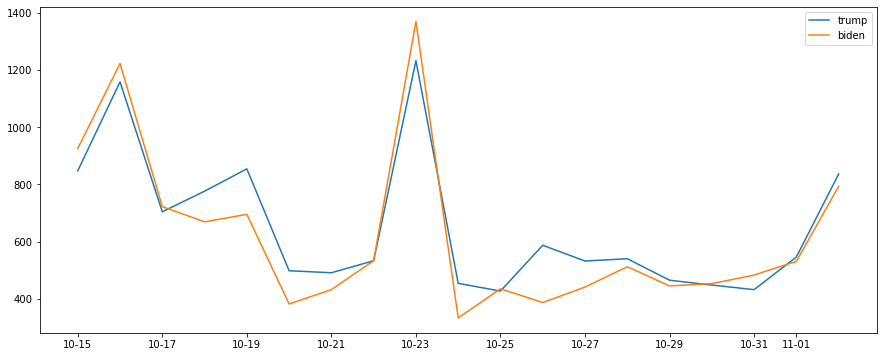

In [82]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates

figure(figsize=(15, 6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.plot(trump_day['created_at'], trump_day['count'], label = 'trump')
plt.plot(biden_day['created_at'], biden_day['count'], label = 'biden')
plt.legend()
plt.show()